In [94]:
import pandas as pd
import glob
import os
import geopandas as gpd

In [111]:
dir_gee = r"A:\US_CornSoy_ClassificationYield\GEEData\State_Monitor"
dir_lai = r"A:\US_CornSoy_ClassificationYield\GEEData\State_Monitor\Lai_Fpar"
dir_ndvi = r"A:\US_CornSoy_ClassificationYield\GEEData\State_Monitor\EVI_NDVI"
dir_cfsv2 = r"A:\US_CornSoy_ClassificationYield\GEEData\State_Monitor\CFSV2"

# LAI and FPAR

In [20]:
FILES_LAI = glob.glob(os.path.join(dir_lai, "*1M.csv"))
FILES_LAI

['A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Fpar_200301_201212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Fpar_201301_202212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Fpar_202201_202212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Fpar_202301_202309_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Lai_200301_201212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Lai_201301_202212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Lai_202201_202212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Illinois_Lai_202301_202309_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\Lai_Fpar\\Indiana_Fpar_200301_201212_1M.csv',
 'A:\\US_CornSoy_Classif

In [ ]:
DF_Lai = pd.DataFrame()
DF_Fpar = pd.DataFrame()

for file in FILES_LAI: 
    #split name 
    basename = os.path.basename(file)
    #remove .csv
    basename = basename[:-4]
    #the last one is frequency or not 
    freq = basename.split("_")[-1]
    if freq == "1M":
        basename = basename[:-3]
    else: 
        pass
    #last one is edate
    edate = basename.split("_")[-1]
    #last two is sdate
    sdate = basename.split("_")[-2]
    #first one is location 
    location = basename.split("_")[0]
    #between the first and last two is the variable
    var = basename.split("_")[1:-2]
    var = var[0]
    print(str(var) + " " + str(location) + " " + str(sdate) + " " + str(edate))
    
    # Read file 
    df = pd.read_csv(file)
    # Add columns
    df["location"] = location

    # Concat to DF
    if var == "Lai":
        DF_Lai = pd.concat([DF_Lai, df], ignore_index=True, axis=0)
    elif var == "Fpar":
        DF_Fpar = pd.concat([DF_Fpar, df], ignore_index=True, axis=0)
    else:
        print("Error: var is not Lai or Fpar: {}".format(var))

DF = DF_Lai.merge(DF_Fpar, on=["date", "location","Month","Year"], how="outer")


In [50]:
dir_out = r"A:\US_CornSoy_ClassificationYield\Processed_Data\State_Monitor"
DF.to_csv(os.path.join(dir_out, "DF_Monthly_Lai_Fpar.csv"), index=False)

# NDVI and EVI

In [54]:
FILES_NDVI = glob.glob(os.path.join(dir_ndvi, "*1M.csv"))
FILES_NDVI

['A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_200301_200512_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_200601_200812_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_200901_201112_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_201201_201412_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_201501_201712_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_201801_202012_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_202101_202310_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_202201_202212_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\EVI_NDVI\\Illinois_EVI_202301_202309_1M.csv',
 'A:\\US_CornSoy_Classificat

In [55]:
DF_NDVI = pd.DataFrame()
DF_EVI = pd.DataFrame()

for file in FILES_NDVI: 
    #split name 
    basename = os.path.basename(file)
    #remove .csv
    basename = basename[:-4]
    #the last one is frequency or not 
    freq = basename.split("_")[-1]
    if freq == "1M":
        basename = basename[:-3]
    else: 
        pass
    #last one is edate
    edate = basename.split("_")[-1]
    #last two is sdate
    sdate = basename.split("_")[-2]
    #first one is location 
    location = basename.split("_")[0]
    #between the first and last two is the variable
    var = basename.split("_")[1:-2]
    var = var[0]
    print(str(var) + " " + str(location) + " " + str(sdate) + " " + str(edate))
    
    # Read file 
    df = pd.read_csv(file)
    # Add columns
    df["location"] = location

    # Concat to DF
    if var == "NDVI":
        DF_NDVI = pd.concat([DF_NDVI, df], ignore_index=True, axis=0)
    elif var == "EVI":
        DF_EVI = pd.concat([DF_EVI, df], ignore_index=True, axis=0)
    else:
        print("Error: var is not NDVI or EVI: {}".format(var))

DF = DF_NDVI.merge(DF_EVI, on=["date", "location","Month","Year"], how="outer")


EVI Illinois 200301 200512
EVI Illinois 200601 200812
EVI Illinois 200901 201112
EVI Illinois 201201 201412
EVI Illinois 201501 201712
EVI Illinois 201801 202012
EVI Illinois 202101 202310
EVI Illinois 202201 202212
EVI Illinois 202301 202309
NDVI Illinois 200301 200512
NDVI Illinois 200601 200812
NDVI Illinois 200901 201112
NDVI Illinois 201201 201412
NDVI Illinois 201501 201712
NDVI Illinois 201801 202012
NDVI Illinois 202101 202310
NDVI Illinois 202201 202212
NDVI Illinois 202301 202309
EVI Indiana 200301 200512
EVI Indiana 200601 200812
EVI Indiana 200901 201112
EVI Indiana 201201 201412
EVI Indiana 201501 201712
EVI Indiana 201801 202012
EVI Indiana 202101 202310
EVI Indiana 202201 202212
EVI Indiana 202301 202309
NDVI Indiana 200301 200512
NDVI Indiana 200601 200812
NDVI Indiana 200901 201112
NDVI Indiana 201201 201412
NDVI Indiana 201501 201712
NDVI Indiana 201801 202012
NDVI Indiana 202101 202310
NDVI Indiana 202201 202212
NDVI Indiana 202301 202309
EVI Iowa 200301 200512
EVI I

In [58]:
dir_out = r"A:\US_CornSoy_ClassificationYield\Processed_Data\State_Monitor"
DF.to_csv(os.path.join(dir_out, "DF_Monthly_NDVI_EVI.csv"), index=False)

# CFSV2

In [112]:
FILES_CFSV2 = glob.glob(os.path.join(dir_cfsv2, "*1M.csv"))
FILES_CFSV2

['A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200301_200306_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200307_200312_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200401_200406_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200407_200412_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200501_200506_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monitor\\CFSV2\\Illinois_Maximum_temperature_height_above_ground_6_Hour_Interval_200507_200512_1M.csv',
 'A:\\US_CornSoy_ClassificationYield\\GEEData\\State_Monit

In [118]:
DF_tmax = pd.DataFrame()
DF_tmin= pd.DataFrame()
DF_prcp = pd.DataFrame()
DF_SM5 = pd.DataFrame()
DF_SM25 = pd.DataFrame()

for file in FILES_CFSV2: 
    #split name 
    basename = os.path.basename(file)
    #remove .csv
    basename = basename[:-4]
    #the last one is frequency or not 
    freq = basename.split("_")[-1]
    if freq == "1M":
        basename = basename[:-3]
    else: 
        pass
    #last one is edate
    edate = basename.split("_")[-1]
    #last two is sdate
    sdate = basename.split("_")[-2]
    #first one is location 
    location = basename.split("_")[0]
    #between the first and last two is the variable
    var = basename.split("_")[1:-2]
    #join them together with "_"
    var = "_".join(var)
    print(str(var) + " " + str(location) + " " + str(sdate) + " " + str(edate))
    
    # Read file 
    df = pd.read_csv(file)
    # Add columns
    df["location"] = location

    # Concat to DF
    if var == "Maximum_temperature_height_above_ground_6_Hour_Interval":
        DF_tmax = pd.concat([DF_tmax, df], ignore_index=True, axis=0)
    elif var == "Minimum_temperature_height_above_ground_6_Hour_Interval":
        DF_tmin = pd.concat([DF_tmin, df], ignore_index=True, axis=0)
    elif var == "Precipitation_rate_surface_6_Hour_Average":
        DF_prcp = pd.concat([DF_prcp, df], ignore_index=True, axis=0)
    elif var == "Volumetric_Soil_Moisture_Content_depth_below_surface_layer_5_cm":
        DF_SM5 = pd.concat([DF_SM5, df], ignore_index=True, axis=0)
    elif var == "Volumetric_Soil_Moisture_Content_depth_below_surface_layer_25_cm":
        DF_SM25 = pd.concat([DF_SM25, df], ignore_index=True, axis=0)
    else:
        print("Error: var is not included: {}".format(var))



Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200301 200306
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200307 200312
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200401 200406
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200407 200412
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200501 200506
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200507 200512
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200601 200606
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200607 200612
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200701 200706
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200707 200712
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200801 200806
Maximum_temperature_height_above_ground_6_Hour_Interval Illinois 200807 200812
Maximum_temperature_height_above_ground_6_Hour_Inter

In [131]:
# Merge all DFs together
DF = DF_tmax.merge(DF_tmin, on=["date", "location","Month","Year"], how="outer")
DF = DF.merge(DF_prcp, on=["date", "location","Month","Year"], how="outer")
DF = DF.merge(DF_SM5, on=["date", "location","Month","Year"], how="outer")
DF = DF.merge(DF_SM25, on=["date", "location","Month","Year"], how="outer")

In [132]:
DF = DF.rename(columns={"mean_Maximum_temperature_height_above_ground_6_Hour_Interval": "Tmax",
                        "mean_Minimum_temperature_height_above_ground_6_Hour_Interval": "Tmin",
                        "mean_Precipitation_rate_surface_6_Hour_Average": "Prcp",
                        "mean_Volumetric_Soil_Moisture_Content_depth_below_surface_layer_5_cm": "Soil_Moisture_5cm",
                        "mean_Volumetric_Soil_Moisture_Content_depth_below_surface_layer_25_cm": "Soil_Moisture_25cm"})

# Reorder columns
DF = DF[["location", "date", "Month","Year","Tmax","Tmin","Soil_Moisture_25cm","Soil_Moisture_5cm","Prcp"]]
DF['Tmax'] = DF['Tmax'] - 273.15
DF['Tmin'] = DF['Tmin'] - 273.15
DF['Prcp'] = DF['Prcp'] * 21600

In [136]:
dir_out = r"A:\US_CornSoy_ClassificationYield\Processed_Data\State_Monitor"
DF.to_csv(os.path.join(dir_out, "DF_Monthly_CFSV2.csv"), index=False)

# Merge together

In [137]:
# Read data
df1 = pd.read_csv(os.path.join(dir_out, "DF_Monthly_Lai_Fpar.csv"))
df2 = pd.read_csv(os.path.join(dir_out, "DF_Monthly_NDVI_EVI.csv"))
df3 = pd.read_csv(os.path.join(dir_out, "DF_Monthly_CFSV2.csv"))

In [138]:
print(df1.shape)
df1.head()

(2565, 6)


,date,mean_Lai,Month,Year,location,mean_Fpar
0,2003-01-31,0.031959,1,2003,Illinois,0.021932
1,2003-02-28,0.032182,2,2003,Illinois,0.024638
2,2003-03-31,0.093116,3,2003,Illinois,0.046949
3,2003-04-30,0.370396,4,2003,Illinois,0.136049
4,2003-05-31,0.820246,5,2003,Illinois,0.285908


In [139]:
print(df2.shape)
df2.head()

(2817, 6)


,date,mean_NDVI,Month,Year,location,mean_EVI
0,2003-01-31,0.207588,1,2003,Illinois,0.380419
1,2003-02-28,0.172683,2,2003,Illinois,0.325378
2,2003-03-31,0.235754,3,2003,Illinois,0.435796
3,2003-04-30,0.344513,4,2003,Illinois,0.628190
4,2003-05-31,0.489144,5,2003,Illinois,0.976407


In [141]:
print(df3.shape)
df3.head()

(3951, 9)


,location,date,Month,Year,Tmax,Tmin,Soil_Moisture_25cm,Soil_Moisture_5cm,Prcp
0,Illinois,2003-01-31,1,2003,-3.004243,-5.830451,0.261052,0.259134,27.313305
1,Illinois,2003-02-28,2,2003,-1.974408,-4.891344,0.274158,0.390160,63.257745
2,Illinois,2003-03-31,3,2003,7.740859,3.421919,0.306193,0.337664,80.096013
3,Illinois,2003-04-30,4,2003,15.652702,10.948437,0.265635,0.256001,89.564288
4,Illinois,2003-05-31,5,2003,19.362447,14.238466,0.271995,0.270325,115.126510


In [142]:
df = pd.merge(df1, df2, on=["date", "location","Month","Year"], how="outer")
df = pd.merge(df, df3, on=["date", "location","Month","Year"], how="outer")
print(df.shape)
df.head()

# rename columns
df.rename(columns = {"mean_Lai":"LAI", "mean_Fpar":"Fpar", "mean_NDVI":"NDVI", "mean_EVI":"EVI"}, inplace=True)
# Rearrange columns
df = df[["date", "location","Month","Year","EVI","LAI","Fpar","NDVI", "Tmax","Tmin","Soil_Moisture_25cm","Soil_Moisture_5cm","Prcp"]]


(11385, 13)


In [143]:
# remove duplicates rows
df = df.drop_duplicates()
print(df.shape)
#remove rows with na vlaues
df = df.dropna()
print(df.shape)

(2255, 13)
(2246, 13)


In [145]:
df.head()

,date,location,Month,Year,EVI,LAI,Fpar,NDVI,Tmax,Tmin,Soil_Moisture_25cm,Soil_Moisture_5cm,Prcp
0,2003-01-31,Illinois,1,2003,0.380419,0.031959,0.021932,0.207588,-3.004243,-5.830451,0.261052,0.259134,27.313305
1,2003-02-28,Illinois,2,2003,0.325378,0.032182,0.024638,0.172683,-1.974408,-4.891344,0.274158,0.390160,63.257745
2,2003-03-31,Illinois,3,2003,0.435796,0.093116,0.046949,0.235754,7.740859,3.421919,0.306193,0.337664,80.096013
3,2003-04-30,Illinois,4,2003,0.628190,0.370396,0.136049,0.344513,15.652702,10.948437,0.265635,0.256001,89.564288
4,2003-05-31,Illinois,5,2003,0.976407,0.820246,0.285908,0.489144,19.362447,14.238466,0.271995,0.270325,115.126510


In [147]:
df.to_csv(os.path.join(dir_out, "DF_Monthly_Lai_NDVI_CFSV2.csv"), index=False)

# Visualiation 

## Table of a month of a state

In [87]:
df

,date,location,Month,Year,LAI,Fpar,NDVI,EVI
0,2003-01-31,Illinois,1,2003,0.031959,0.021932,0.207588,0.380419
1,2003-02-28,Illinois,2,2003,0.032182,0.024638,0.172683,0.325378
2,2003-03-31,Illinois,3,2003,0.093116,0.046949,0.235754,0.435796
3,2003-04-30,Illinois,4,2003,0.370396,0.136049,0.344513,0.628190
4,2003-05-31,Illinois,5,2003,0.820246,0.285908,0.489144,0.976407
...,...,...,...,...,...,...,...,...
4084,2023-05-31,South Dakota,5,2023,1.251457,0.322314,0.393324,0.736959
4088,2023-06-30,South Dakota,6,2023,4.408343,0.853846,0.503439,0.999973
4092,2023-07-31,South Dakota,7,2023,5.396023,0.920843,0.741368,1.638632
4096,2023-08-31,South Dakota,8,2023,5.310922,0.915337,0.774188,1.717813


In [89]:
df_sub = df[(df['location'] == "Illinois") & (df['Month'] == 7)]
df_sub.head()

,date,location,Month,Year,LAI,Fpar,NDVI,EVI
6,2003-07-31,Illinois,7,2003,3.431368,0.793641,0.743866,1.677357
18,2004-07-31,Illinois,7,2004,3.260333,0.777652,0.834309,1.945386
30,2005-07-31,Illinois,7,2005,2.995322,0.770294,0.797624,1.812428
42,2006-07-31,Illinois,7,2006,3.610369,0.821902,0.784706,1.810162
54,2007-07-31,Illinois,7,2007,3.848891,0.835918,0.799650,1.843445


# Map of a month

In [105]:
df_sub2 = df[(df['Year'] == 2023) & (df['Month'] == 7)]
df_sub2

,date,location,Month,Year,LAI,Fpar,NDVI,EVI
444,2023-07-31,Illinois,7,2023,3.996586,0.860035,0.821653,1.922044
900,2023-07-31,Indiana,7,2023,4.211667,0.854144,0.782331,1.822167
1356,2023-07-31,Iowa,7,2023,4.796365,0.895251,0.802435,1.938791
1812,2023-07-31,Kansas,7,2023,4.782763,0.880749,0.710288,1.567686
2268,2023-07-31,Missouri,7,2023,3.159818,0.766084,0.727917,1.616364
2724,2023-07-31,Nebraska,7,2023,5.307076,0.920439,0.781910,1.810452
3180,2023-07-31,North Dakota,7,2023,4.442082,0.858636,0.733485,1.612338
3636,2023-07-31,Ohio,7,2023,3.775072,0.814306,0.752118,1.700789
4092,2023-07-31,South Dakota,7,2023,5.396023,0.920843,0.741368,1.638632


<AxesSubplot:>

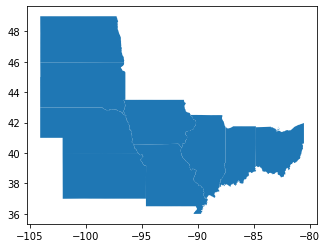

In [106]:
# Shapefile of US states
US_States = gpd.read_file(r"A:\US_CornSoy_ClassificationYield\Geodata\Base_Data\cb_2018_us_state_500k.shp")
US_States_sub = US_States[US_States['NAME'].isin(df_sub2['location'].unique())]
US_States_sub.plot()

In [108]:
# Merge df_sub2 and US_States_sub
df_sub2 = US_States_sub.merge(df_sub2, left_on='NAME', right_on='location', how='left')
df_sub2.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,date,location,Month,Year,LAI,Fpar,NDVI,EVI
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05342 41.17054, -104.05324 41.1...",2023-07-31,Nebraska,7,2023,5.307076,0.920439,0.781910,1.810452
1,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...",2023-07-31,South Dakota,7,2023,5.396023,0.920843,0.741368,1.638632
2,29,01779791,0400000US29,29,MO,Missouri,00,178050802184,2489425460,"POLYGON ((-95.77355 40.57820, -95.76853 40.583...",2023-07-31,Missouri,7,2023,3.159818,0.766084,0.727917,1.616364
3,20,00481813,0400000US20,20,KS,Kansas,00,211755344060,1344141205,"POLYGON ((-102.05174 40.00308, -101.91670 40.0...",2023-07-31,Kansas,7,2023,4.782763,0.880749,0.710288,1.567686
4,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",2023-07-31,Illinois,7,2023,3.996586,0.860035,0.821653,1.922044


<AxesSubplot:>

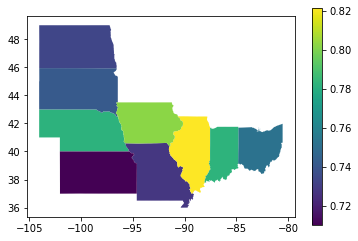

In [110]:
df_sub2.plot(column='NDVI', legend=True)